In [1]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.info()    # no null value present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
iris['target']=iris['Species'].replace({'Iris-versicolor': '0', 'Iris-setosa':'1', 'Iris-virginica':'2'})
iris=iris.drop('Species',axis=1)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [9]:
iris.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# EDA

In [10]:
iris=iris.drop('Id',axis=1)

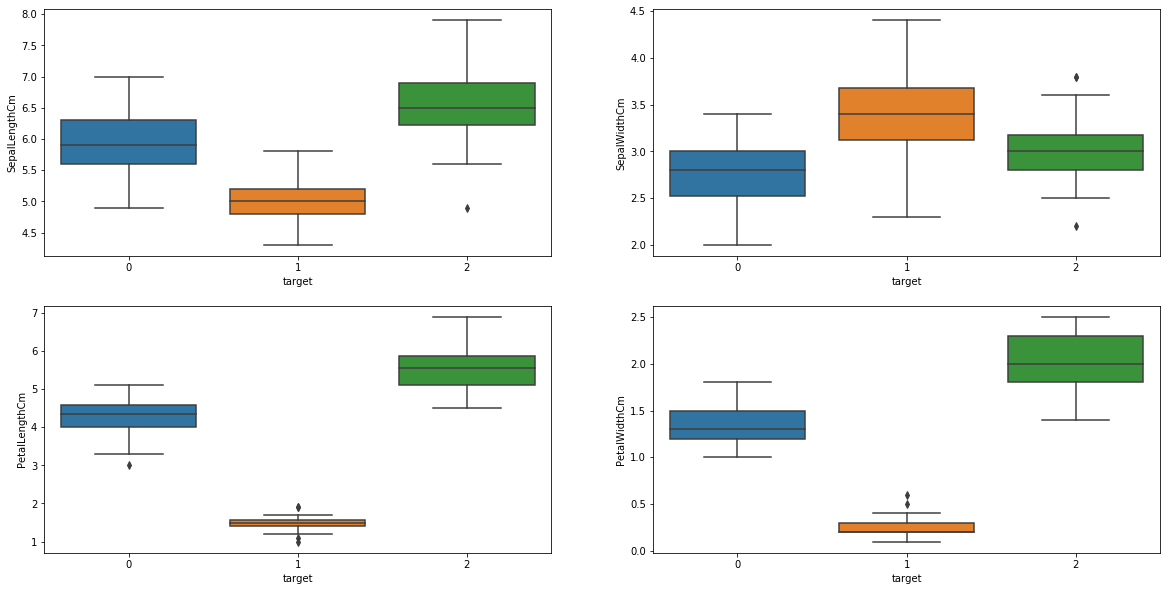

In [11]:
# boxplot 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x='target',y='SepalLengthCm',data=iris)

plt.subplot(2,2,2) 
sns.boxplot(x='target',y='SepalWidthCm',data=iris)

plt.subplot(2,2,3)
sns.boxplot(x='target',y='PetalLengthCm',data=iris)

plt.subplot(2,2,4)
sns.boxplot(x='target',y='PetalWidthCm',data=iris)

#  Train and Test split

In [12]:
X=iris.drop('target',axis=1)
y=iris.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Build Decision tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier()

In [16]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
clf.score(X_train,y_train)

1.0

In [18]:
clf.score(X_test,y_test)

1.0

In [19]:
y_pred =clf.predict(X_test)

In [20]:
import pydotplus
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz 2.44/bin"
import graphviz

In [21]:
dot_data =tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['0','1','2'],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data)

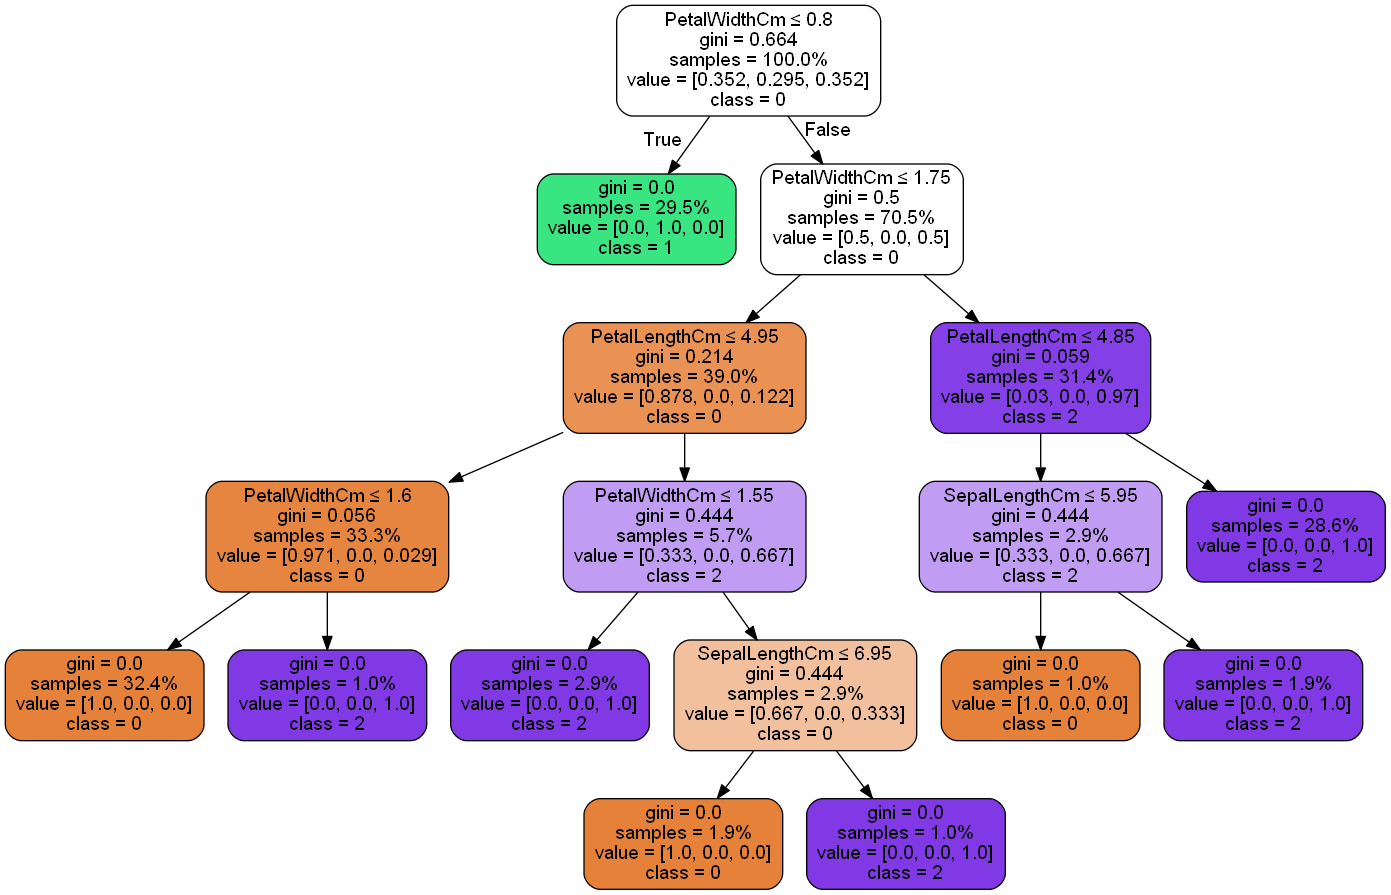

In [23]:
from IPython.display import Image
Image(graph.create_png())